In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn import preprocessing
from keras.preprocessing import image
from sklearn.model_selection import train_test_split

In [2]:
base_dir = '/content/drive/MyDrive/shot/'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'test')

In [3]:
BATCH_SIZE = 5
IMG_SIZE = (180, 180)

train = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

Found 100 files belonging to 2 classes.


In [4]:
validation = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)

Found 30 files belonging to 2 classes.


In [5]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=2,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)

94765736/94765736 [==============================] - 2s 0us/step


In [6]:
resnet_model.add(tf.keras.layers.Flatten())
resnet_model.add(tf.keras.layers.Dense(512, activation='relu'))
resnet_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [7]:
resnet_model.compile(tf.keras.optimizers.Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

history = resnet_model.fit(train, validation_data=validation, epochs=50)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


20/20 [==============================] - 42s 1s/step - loss: 1.0285 - accuracy: 0.6200 - val_loss: 0.7649 - val_accuracy: 0.6667
Epoch 2/50
20/20 [==============================] - 16s 800ms/step - loss: 0.4686 - accuracy: 0.7900 - val_loss: 0.9115 - val_accuracy: 0.6667
Epoch 3/50
20/20 [==============================] - 17s 847ms/step - loss: 0.2628 - accuracy: 0.9000 - val_loss: 0.7066 - val_accuracy: 0.8000
Epoch 4/50
20/20 [==============================] - 18s 905ms/step - loss: 0.0893 - accuracy: 0.9900 - val_loss: 0.9476 - val_accuracy: 0.7333
Epoch 5/50
20/20 [==============================] - 16s 791ms/step - loss: 0.0868 - accuracy: 0.9800 - val_loss: 0.9303 - val_accuracy: 0.7333
Epoch 6/50
20/20 [==============================] - 18s 892ms/step - loss: 0.0351 - accuracy: 1.0000 - val_loss: 0.8573 - val_accuracy: 0.7333
Epoch 7/50
20/20 [==============================] - 16s 794ms/step - loss: 0.0320 - accuracy: 1.0000 - val_loss: 1.0267 - val_accuracy: 0.6000
Epoch 8/50
20

Text(0.5, 1.0, 'Training and Validation Accuracy (ResNet50)')

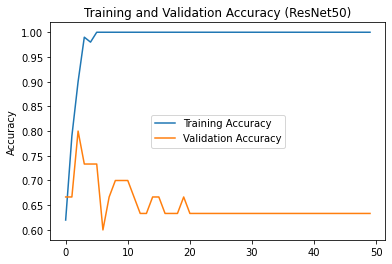

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='center')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy (ResNet50)')

In [12]:
loss, accuracy = resnet_model.evaluate(validation)
print('Test accuracy :', accuracy)

6/6 [==============================] - 4s 596ms/step - loss: 1.5493 - accuracy: 0.6333
Test accuracy : 0.6333333253860474
